### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('diabetes.csv')
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [3]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0], dtype=int64)

In [4]:
df1.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [5]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측치 없음

## **결측치는 없지만 0이 나올 수 있는 변수와 아닌 변수를 구분해서 EDA 할 것**

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

!pip install koreanize-matplotlib
import koreanize_matplotlib

from IPython.display import display
import seaborn as sns

In [7]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 전체 변수 상관관계 확인

In [10]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


C:\Users\SAMSUNG\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


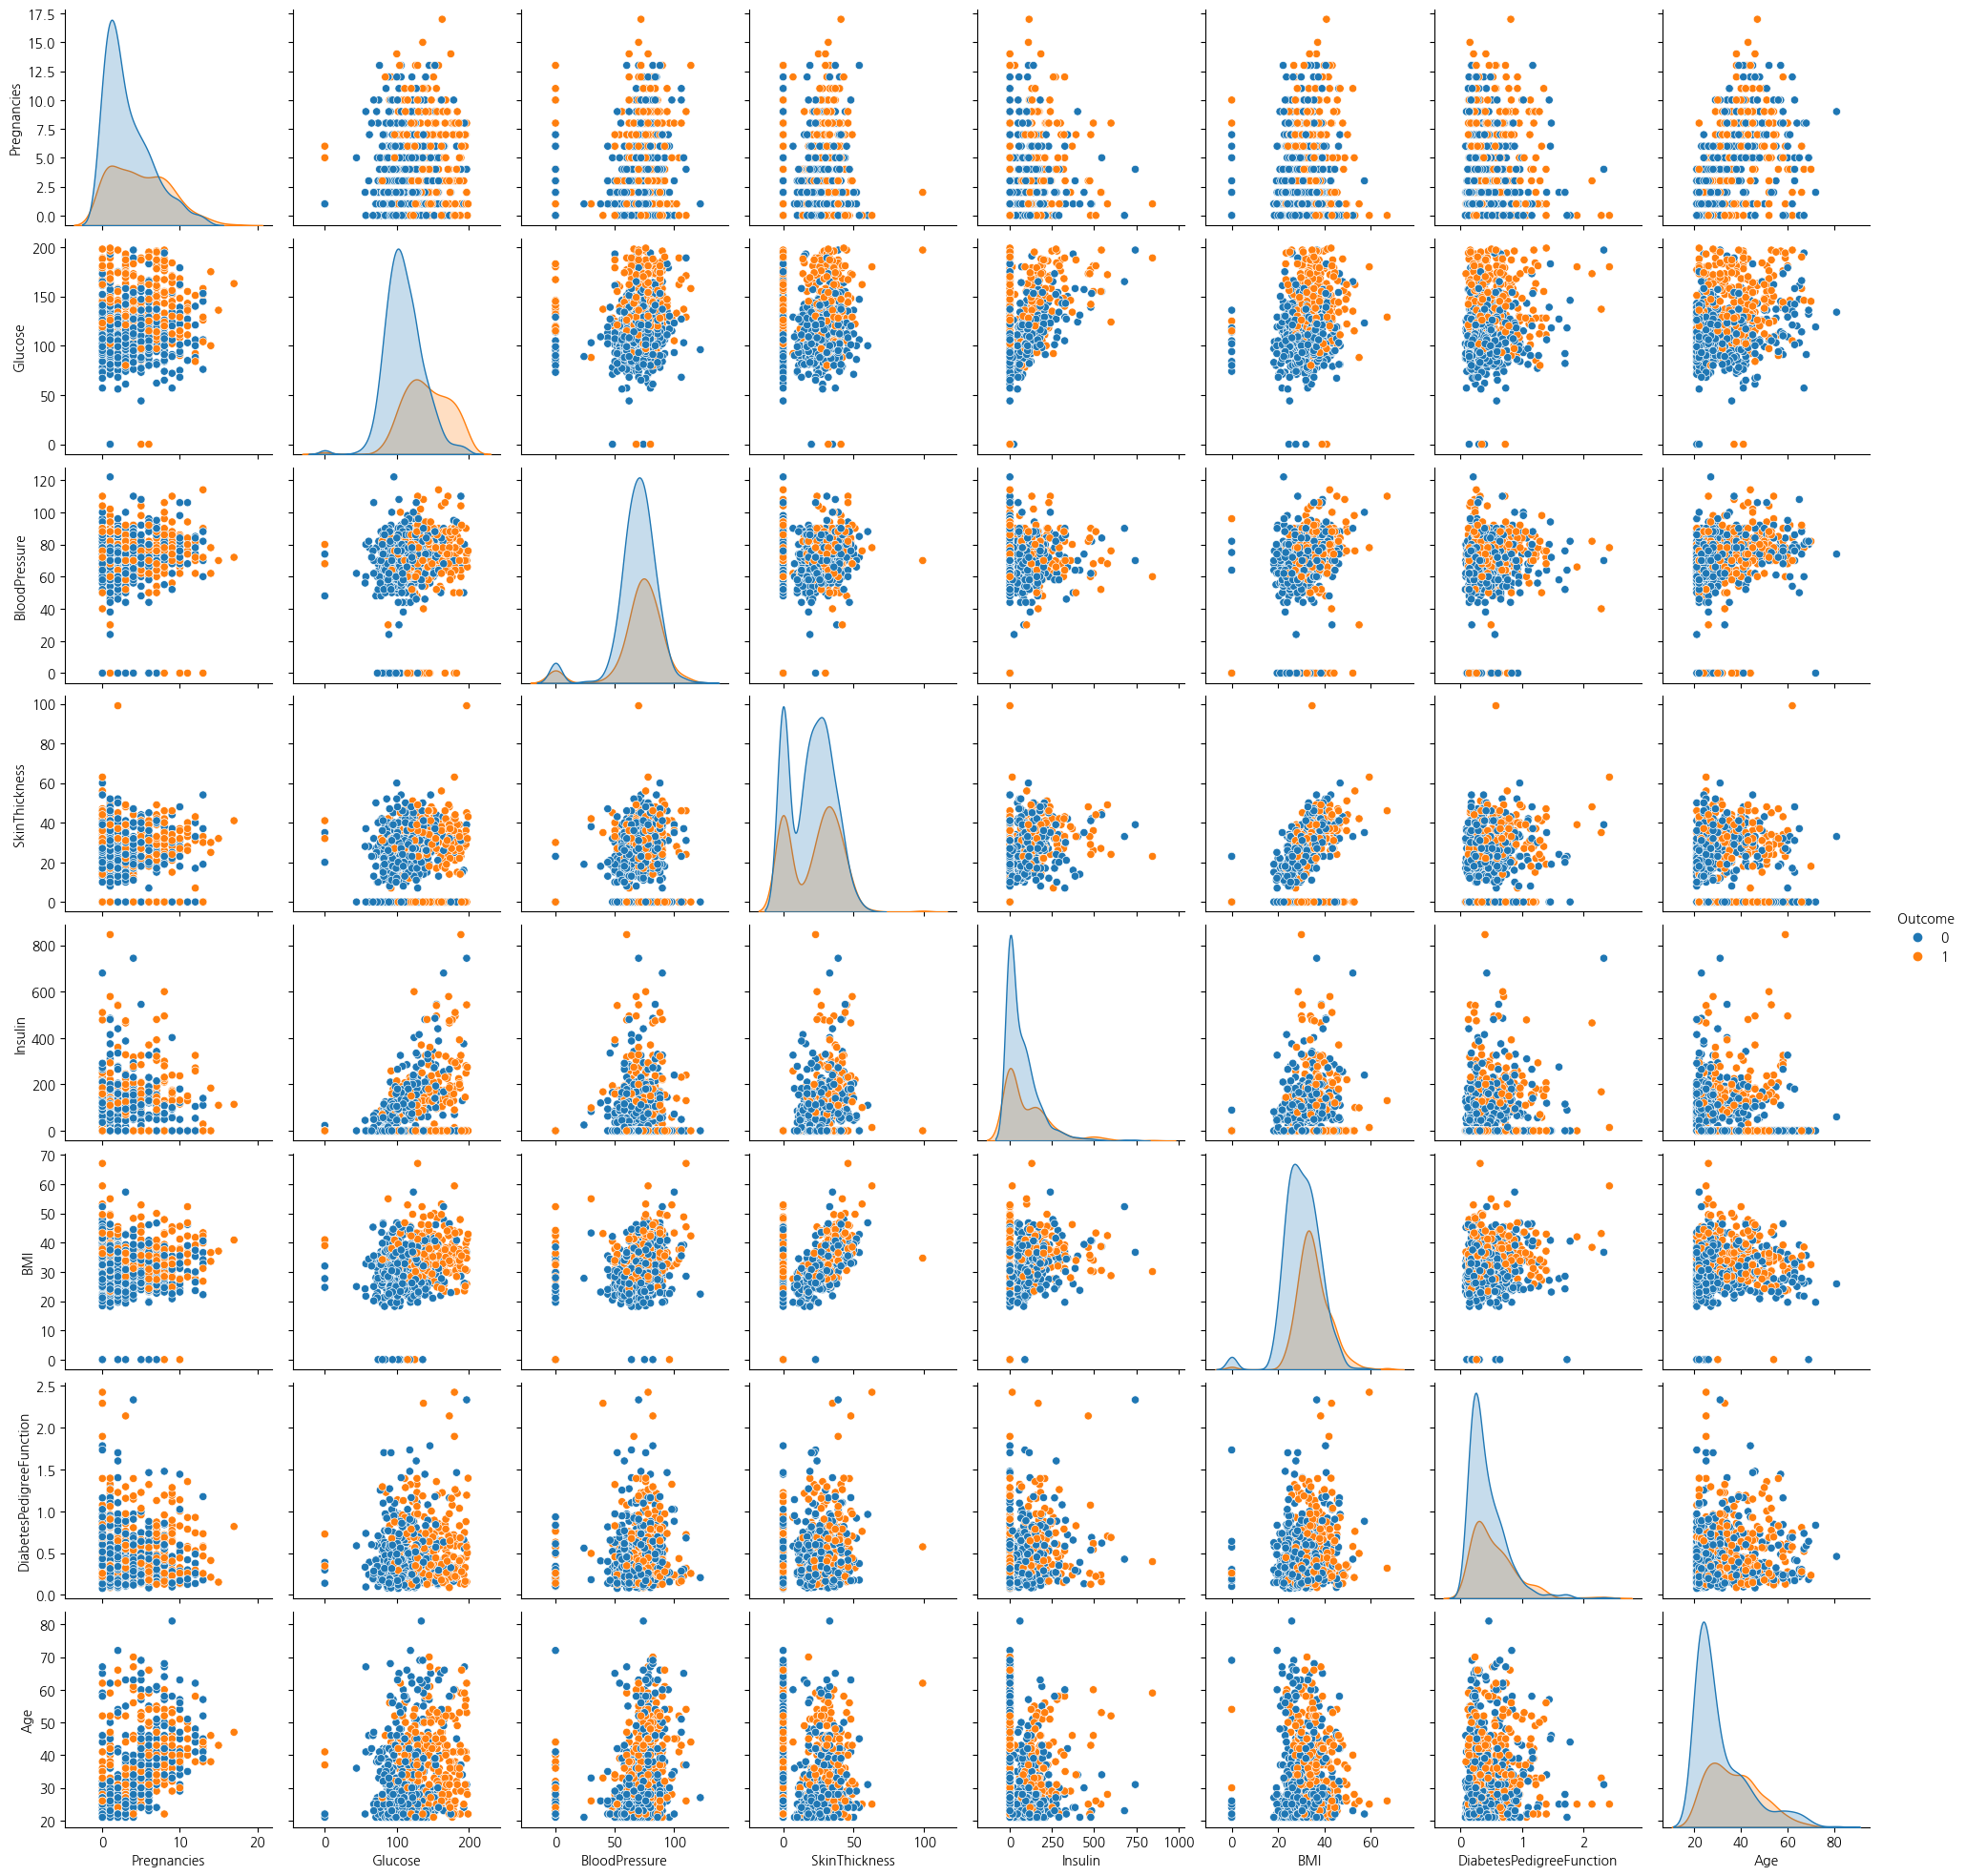

In [11]:
sns.pairplot(
    df1,
    hue='Outcome'
)
plt.show()

각 변수들의 상관관계를 확인한 후 이를 그래프로 나타내었다. Glucose는 분포가 가장 명확하게 분리되었으며, BMI 변수에서는 당뇨(Outcome=1)일 때 BMI가 큰 값에 치우치는 경향을 보인다. AGE 변수에서는 당뇨(Outcome=1)가 상대적으로 고령이며, DiabetesPedigreeFunction에서는 분산은 작지만 꼬리쪽에서 차이를 보인다. 

## **Pregrance**
 - 임신횟수

In [12]:
# 셀 추가해서 EDA 하기

### 결측치 처리

In [13]:
df1['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

<Axes: >

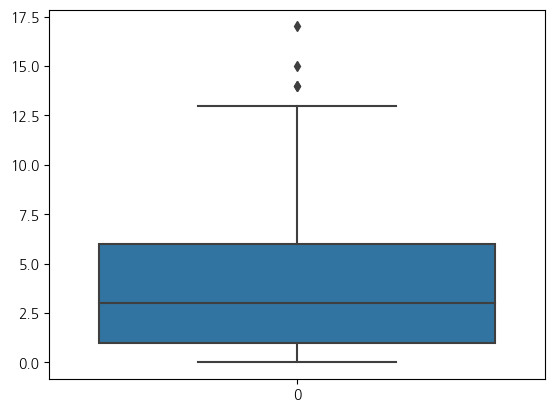

In [14]:
sns.boxplot(df1['Pregnancies'])

임신 횟수 데이터는 최솟값이 0, 최댓값이 17회이다.
5회 이상부터는 평균보다 확연히 높은 횟수로 보이나, 가능한 경우도 있기 때문에 처리하지 않았다. 
Pregnancies는 0일 수 있는 변수이기 때문에 따로 결측치 처리를 하지 않는다. 

### EDA

In [15]:
df1['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [16]:
pd.crosstab(df1["Outcome"], df1["Pregnancies"])

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


<Axes: xlabel='Pregnancies', ylabel='Count'>

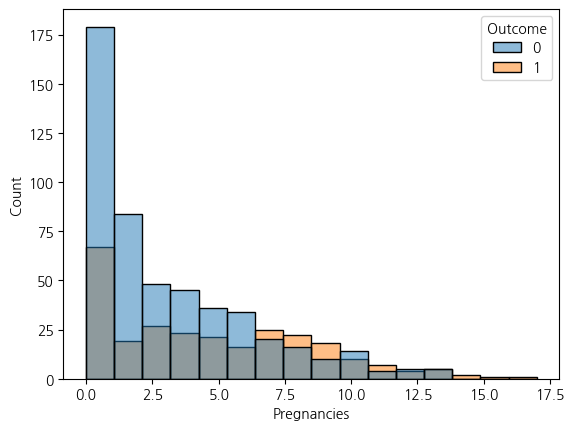

In [17]:
sns.histplot(x="Pregnancies", hue = "Outcome",data = df1 )

Pregnancies 변수의 값이 커질 수록 당뇨병일 확률이 증가하는 경향이 보인다는 것을 확인할 수 있다.

In [18]:
df1['Pregnancy_value'] = pd.cut(df1['Pregnancies'], 
                                  bins=[-0.1,0,6,17], 
                                  include_lowest=True, 
                                  labels=['Class1','Class2','Class3'])

<Axes: xlabel='Pregnancy_value', ylabel='Count'>

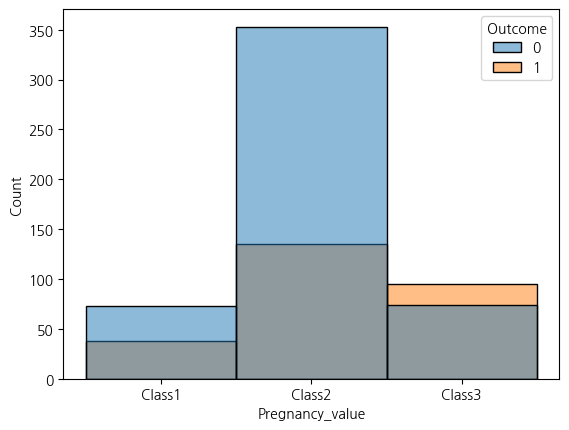

In [19]:
sns.histplot(x="Pregnancy_value", hue = "Outcome",data = df1 )

In [20]:
pd.crosstab(df1["Outcome"], df1["Pregnancy_value"])

Pregnancy_value,Class1,Class2,Class3
Outcome,,,
0,73,353,74
1,38,135,95


In [21]:
pd.crosstab(df1["Outcome"], df1["Pregnancy_value"],normalize='columns')

Pregnancy_value,Class1,Class2,Class3
Outcome,,,
0,0.657658,0.723361,0.43787
1,0.342342,0.276639,0.56213


Text(51.722222222222214, 0.5, 'Outcome')

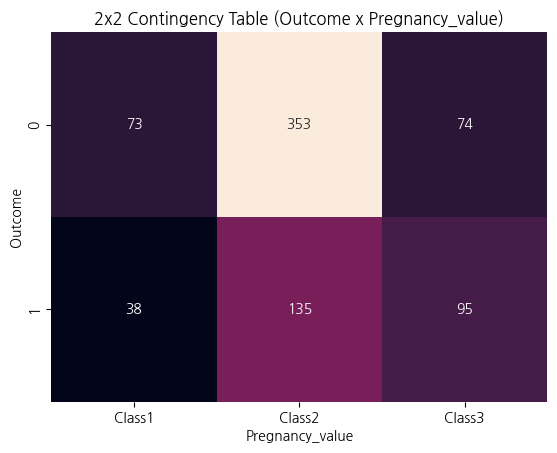

In [22]:
ct = pd.crosstab(df1["Outcome"], df1["Pregnancy_value"])
sns.heatmap(ct, annot=True, fmt="d", cbar=False)
plt.title("2x2 Contingency Table (Outcome x Pregnancy_value)")
plt.xlabel("Pregnancy_value")
plt.ylabel("Outcome")

이를 더 자세히 확인하기 위해 범주로 나눠본 결과 임신횟수가 0회, 1-6회일때는 당뇨병일 확률이 당뇨병이 아닐 확률보다 낮았지만, 7회 이상부터는 당뇨병일 확률이 급격히 증가했다는 것을 볼 수 있다. 
(범주는 min, 25-75 percentile, 75 percentile-Max로 지정하였다. )

In [23]:
df1.drop(columns=['Pregnancy_value'], inplace=True)

상관관계를 비교하기 위해 앞에서 생성한 범주형 변수 Pregnancy_value를 제거하였다. 

In [24]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df1.corr()['Pregnancies']

Pregnancies                 1.000000
Glucose                     0.129459
BloodPressure               0.141282
SkinThickness              -0.081672
Insulin                    -0.073535
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Age                         0.544341
Outcome                     0.221898
Name: Pregnancies, dtype: float64

In [26]:
df1['Pregnancies'].corr(df1['Outcome'])

0.22189815303398652

In [27]:
df1['Pregnancies'].corr(df1['Age'])

0.544341228402339

### **변수 인사이트 정리**

임신 횟수 데이터는 최솟값이 0, 최댓값이 17회이다.
5회 이상부터는 평균보다 확연히 높은 횟수로 보이나, 가능한 경우도 있기 때문에 처리하지 않았다. 
Pregnancies는 0일 수 있는 변수이기 때문에 따로 결측치 처리를 하지 않는다. 
Pregnancies 변수의 값이 특정 값을 넘어가면(7회이상) 당뇨병일 확률이 증가하는 경향이 보인다는 것을 확인할 수 있다.
다만, Pregnancies 변수와 Outcome의 상관관계를 조사해본 결과 유의미한 값이 나오지 않았다. 
하지만 Pregnancies 변수와 Age에서는 강한 상관관계를 확인할 수 있었다. 

## **glucose**
- 혈장 포도당 농도
- 사람 혈당이 0일 수는 없다.
- 당뇨는 혈당이 지속적으로 높은 증상

저혈당쇼크: < 50 mg/dL
임상적 중증 위험 시작: <54 mg/dL
저혈당: <70 mg/dL
정상: 70-99 mg/dL
전당뇨: 100-125 mg/dL
당뇨: >= 126 mg/dL

이처럼 Glucose는 혈당이 50 이하일 경우 저혈당 쇼크가 찾아올 수 있기 때문에, 0일 수 없는 변수이다. 

출처: 대한당뇨병학회 / 당뇨병 진료지침

In [28]:
# 셀 추가해서 EDA 하기

### 결측치 처리

In [29]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

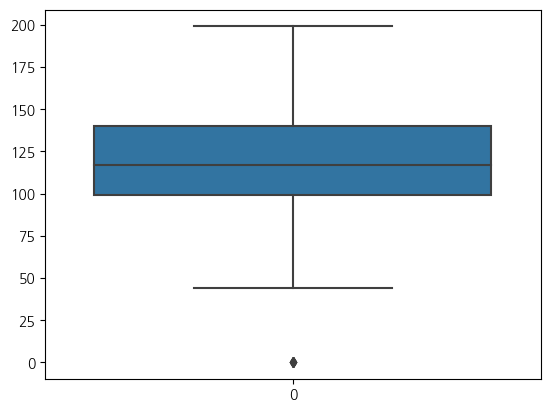

In [30]:
sns.boxplot(df1['Glucose'])

In [31]:
low_glucose_df = df1[df1['Glucose'] < 50]
low_glucose_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62,0,0,25.0,0.587,36,0
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Glucose는 혈당이 50 이하일 경우 저혈당 쇼크가 찾아올 수 있기 때문에 50보다 작은 값을 추출했지만, 44까지는 가능한 범위로 보인다.
그러므로 Glucose 값이 0인 자료들만 다른 값(중앙값)으로 대체하는 것이 적당해 보인다. 

In [32]:
low_glucose_df1 = df1[df1['Glucose'] == 0]
low_glucose_df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Glucose자료가 0인 데이터의 개수는 총 5개이다. 

In [33]:
df1['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Glucose의 Max 값을 확인해본 결과 고혈당 범위에 속하지만 충분히 나올 수 있는 값이므로 따로 처리하지 않는다. 

In [34]:
df1['Glucose'] = df1['Glucose'].replace(0, np.nan)

In [35]:
df1['Glucose'].isna().sum()

5

Glucose가 0인 값들이 NA로 치환됨. 

In [36]:
median_glucose = df1['Glucose'].median()
df1['Glucose'] = df1['Glucose'].fillna(median_glucose)

In [37]:
(df1['Glucose'] == 0).sum()

0

In [38]:
df1['Glucose'].isna().sum()

0

Glucose 변수의 결측치를 중앙값으로 대체하였다. 

### EDA

In [39]:
df1['Glucose'].describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [40]:
np.sort(df1['Glucose'].unique())

array([ 44.,  56.,  57.,  61.,  62.,  65.,  67.,  68.,  71.,  72.,  73.,
        74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
        85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
       107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
       118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128.,
       129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 139.,
       140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150.,
       151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161.,
       162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172.,
       173., 174., 175., 176., 177., 178., 179., 180., 181., 182., 183.,
       184., 186., 187., 188., 189., 190., 191., 193., 194., 195., 196.,
       197., 198., 199.])

<Axes: xlabel='Glucose', ylabel='Count'>

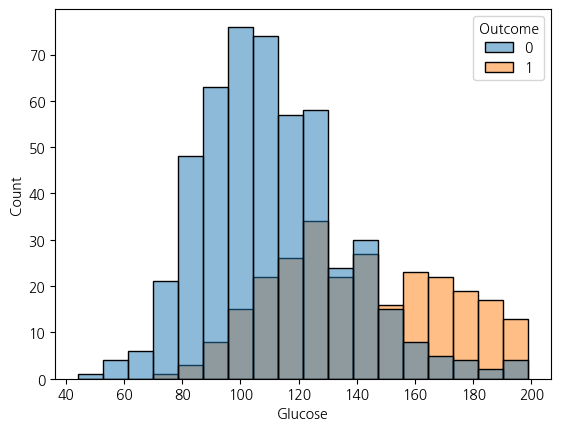

In [41]:
sns.histplot(x="Glucose", hue = "Outcome",data = df1 )

Glucose는 연속형, Outcome은 범주형 변수이므로 histogram을 통해 비교하였다. 
Glucomse가 150 이상일때 당뇨병일 확률이 급격히 증가하는 것을 볼 수 있다. 

In [42]:
df1.corr()['Glucose']

Pregnancies                 0.128213
Glucose                     1.000000
BloodPressure               0.158332
SkinThickness               0.074455
Insulin                     0.331709
BMI                         0.235035
DiabetesPedigreeFunction    0.137327
Age                         0.266909
Outcome                     0.492782
Name: Glucose, dtype: float64

In [43]:
df1['Glucose'].corr(df1['Outcome'])

0.49278240391502615

In [44]:
df1['Glucose'].corr(df1['Insulin'])

0.3317094337132733

### **변수 인사이트 정리**

Glucose 데이터는 최솟값이 0, 최댓값이 199이다.
하지만 Glucose는 혈당이 50 이하일 경우 저혈당 쇼크가 찾아올 수 있기 때문에, 0일 수 없는 변수이다. 그러므로 Glucose 값이 0인 자료들만 중앙값으로 대체하였다. 
Glucose와 Outcome을 비교하여 Histogram을 그려본 결과, Glucose가 150 이상일때 당뇨병일 확률이 급격히 증가하는 것을 확인할 수 있다. 
또한 Glucose 변수와 Outcome의 상관관계를 조사해본 결과 강한 상관관계를 가진다는 것을 볼 수 있다. 
Glucose 변수와 Insulin 변수 간에도 일정 수준의 상관관계가 관찰되었다. 

## **bloodpressure**
- 혈압
- 혈압도 0일 수는 없다 

In [45]:
# 셀 추가해서 EDA 하기

### 결측치 대체

질병관리청 국가건강정보포털에 따르면, 혈압 범위는 다음과 같다. 
-  수축기 혈압 vs 이완기 혈압
- 저혈압     |        < 90      |    < 60
- 정상       |        < 120     |    < 80
- 고혈압 전단계   |   120-139   |    80-89
- 고혈압 1단계   |    140-159   |    90-99
- 고혈압 2단계   |    >=160     |    >=100
- 수축기 단독고혈압  |  >=140     |    < 90

출처: https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=6698

In [46]:
df1['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

위 자료에 따라 혈압이 0일 수는 없으므로 0은 결측치라고 가정했을 때, 25 percentile이 62, max가 122인 것을 보면 이완기 혈압이라고 추측할 수 있다. 

In [47]:
np.sort(df1['BloodPressure'].unique())

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
        78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
       100, 102, 104, 106, 108, 110, 114, 122], dtype=int64)

<Axes: >

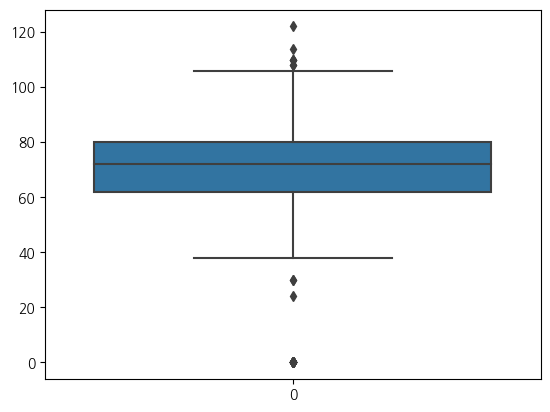

In [48]:
sns.boxplot(df1['BloodPressure'])

(Q3 - 1.5 * IQR) 값을 기준으로 아래에 존재하는 값은 이상치이므로 대체하려 했으나, 매우 예외적인 경우이지만 실현 가능한 혈압이라고 하여 대체하지 않기로 했다. 

In [49]:
low_BP_df1 = df1[df1['BloodPressure'] == 0]
low_BP_df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [50]:
df1['BloodPressure'] = df1['BloodPressure'].replace(0, np.nan)

In [51]:
df1['BloodPressure'].isna().sum()

35

BloodPressure가 0인 값들(35개의 자료)이 NA로 치환됨. 

In [52]:
median_BloodPressure = df1['BloodPressure'].median()
df1['BloodPressure'] = df1['BloodPressure'].fillna(median_BloodPressure)

In [53]:
(df1['BloodPressure'] == 0).sum()

0

In [54]:
df1['BloodPressure'].isna().sum()

0

BloodPressure 변수의 결측치를 중앙값으로 대체하였다. 

### EDA

In [55]:
df1['BloodPressure'].describe()

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [56]:
np.sort(df1['BloodPressure'].unique())

array([ 24.,  30.,  38.,  40.,  44.,  46.,  48.,  50.,  52.,  54.,  55.,
        56.,  58.,  60.,  61.,  62.,  64.,  65.,  66.,  68.,  70.,  72.,
        74.,  75.,  76.,  78.,  80.,  82.,  84.,  85.,  86.,  88.,  90.,
        92.,  94.,  95.,  96.,  98., 100., 102., 104., 106., 108., 110.,
       114., 122.])

<Axes: xlabel='BloodPressure', ylabel='Count'>

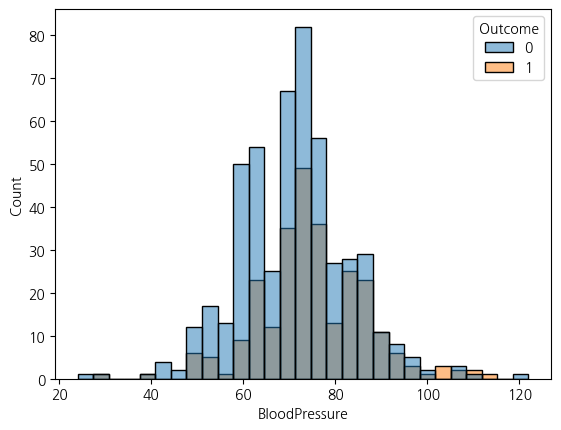

In [57]:
sns.histplot(x="BloodPressure", hue = "Outcome",data = df1 )

BloodPressure 연속형, Outcome은 범주형 변수이므로 histogram을 통해 비교하였다. 
BloodPressure 110 이상일때 당뇨병일 확률이 급격히 증가하는 것을 볼 수 있다. 

In [58]:
df1['BP_category'] = pd.cut(df1['BloodPressure'], 
                                  bins=[0,60,80,90,100,110,122], 
                                  include_lowest=True, 
                                  labels=['Hypo','Desired','Prehyper', 'Hyper Stage1', 'Hyper Stage2', 'Hyper emergency'])

In [59]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BP_category
0,6,148.0,72.0,35,0,33.6,0.627,50,1,Desired
1,1,85.0,66.0,29,0,26.6,0.351,31,0,Desired
2,8,183.0,64.0,0,0,23.3,0.672,32,1,Desired
3,1,89.0,66.0,23,94,28.1,0.167,21,0,Desired
4,0,137.0,40.0,35,168,43.1,2.288,33,1,Hypo


<Axes: xlabel='BP_category', ylabel='Count'>

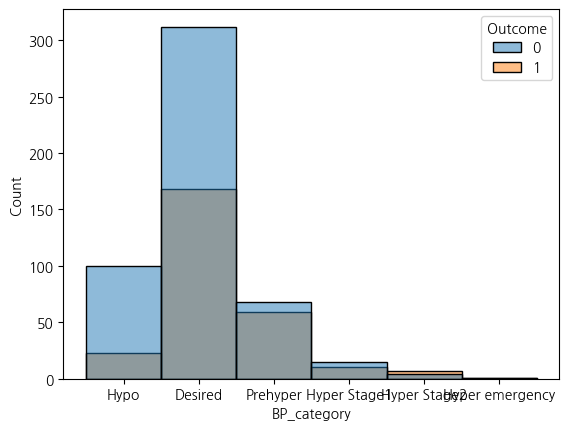

In [60]:
sns.histplot(x="BP_category", hue = "Outcome",data = df1 )

In [61]:
pd.crosstab(df1["Outcome"], df1["BP_category"])

BP_category,Hypo,Desired,Prehyper,Hyper Stage1,Hyper Stage2,Hyper emergency
Outcome,,,,,,
0,100,312,68,15,4,1
1,23,168,59,10,7,1


In [62]:
pd.crosstab(df1["Outcome"], df1["BP_category"],normalize='columns')

BP_category,Hypo,Desired,Prehyper,Hyper Stage1,Hyper Stage2,Hyper emergency
Outcome,,,,,,
0,0.813008,0.65,0.535433,0.6,0.363636,0.5
1,0.186992,0.35,0.464567,0.4,0.636364,0.5


Text(51.722222222222214, 0.5, 'Outcome')

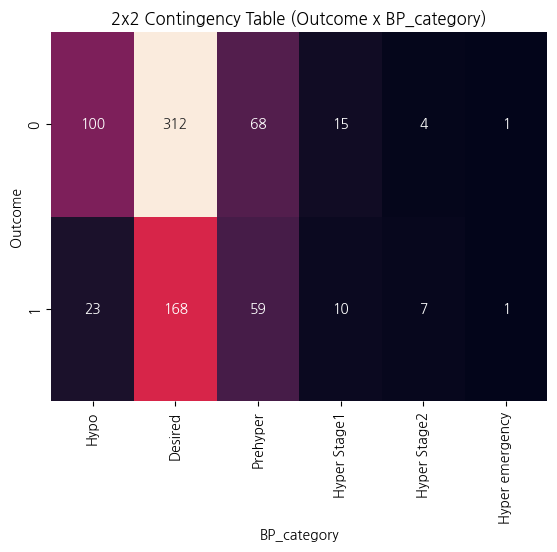

In [63]:
ct = pd.crosstab(df1["Outcome"], df1["BP_category"])
sns.heatmap(ct, annot=True, fmt="d", cbar=False)
plt.title("2x2 Contingency Table (Outcome x BP_category)")
plt.xlabel("BP_category")
plt.ylabel("Outcome")

In [64]:
df1.drop(columns=['BP_category'], inplace=True)

In [65]:
df1.corr()['BloodPressure']

Pregnancies                 0.208615
Glucose                     0.218937
BloodPressure               1.000000
SkinThickness               0.007937
Insulin                    -0.045769
BMI                         0.234336
DiabetesPedigreeFunction   -0.002378
Age                         0.324915
Outcome                     0.165723
Name: BloodPressure, dtype: float64

In [66]:
df1['BloodPressure'].corr(df1['Age'])

0.3249153914368767

### **변수 인사이트 정리**

혈압이 0일 수는 없으므로 혈압이 0인 값들을 결측치라고 가정하였다. 그 후, Blood Pressure 변수의 결측치를 중앙값으로 대체하였다. 
0을 제외한 min이 24, 평균이 72, max가 122인 것을 보면 Blood Pressure 변수는 수축기 혈압보다는 이완기 혈압을 나타낸다고 추측할 수 있다. 
BloodPressure과 Outcome을 histogram을 통해 비교한 결과, BloodPressure과 Outcome 사이관계를 한 번에 알아보기는 힘들지만 BloodPressure가 110 이상일때 당뇨병일 확률이 증가하는 경향을 보인다는 것을 알 수 있다. 
더 자세히 알아보기 위해 BloodPressure를 저혈압, 정상, 고혈압전단계, 고혈압 1단계, 고혈압 2단계, 고혈압최고단계로 범주화하여 table을 통해 BloodPressure과 Outcome의 관계를 알아보았다. 
그 결과 혈압이 증가할 수록 당뇨병일 확률이 증가하는 경향을 보인다는 것을 알 수 있었다. 
마지막으로 상관관계를 분석해본 결과 BloodPressure과 변수와 Age 변수 간에 일정 수준의 상관관계가 관찰되었지만, 다른 변수들과는 유의미한 상관관계를 보이지 않았다. 

## **SkinThickness**
- 삼두근 피부 두께
- 체지방이란 관련이 있다.
- 0일 수 없다

In [67]:
# 셀 추가해서 EDA 하기

In [68]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


### 결측치 대체

In [69]:
df1['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [70]:
np.sort(df1['SkinThickness'].unique())

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99],
      dtype=int64)

<Axes: >

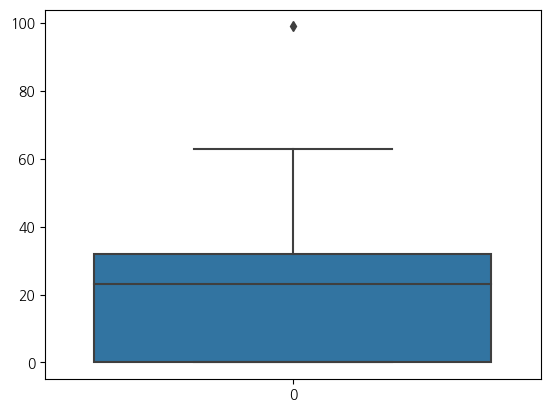

In [71]:
sns.boxplot(df1['SkinThickness'])

In [72]:
low_SkinThickness_df1 = df1[df1['SkinThickness'] == 0]
low_SkinThickness_df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,0,0,23.3,0.672,32,1
5,5,116.0,74.0,0,0,25.6,0.201,30,0
7,10,115.0,72.0,0,0,35.3,0.134,29,0
9,8,125.0,96.0,0,0,0.0,0.232,54,1
10,4,110.0,92.0,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,0,0,36.3,0.258,52,1
758,1,106.0,76.0,0,0,37.5,0.197,26,0
759,6,190.0,92.0,0,0,35.5,0.278,66,1
762,9,89.0,62.0,0,0,22.5,0.142,33,0


In [73]:
df1['SkinThickness'] = df1['SkinThickness'].replace(0, np.nan)

In [74]:
df1['SkinThickness'].isna().sum()

227

SkinThickness 변수가 0인 값들(227개의 자료)이 NA로 치환됨. 이전의 변수들은 결측치의 비율이 전체 데이터의 5%를 넘지 않았지만, SkinThickness 변수같은 경우에는 모두 중앙값으로 대체하기에는 결측치의 개수가 많다. 
결측치 대체 방법 중 첫번째는 SkinThickness 변수가 BMI 변수와 연관되어 있으므로 범주를 나눠서 범주별 중앙값으로 대체하는 방법이다. 하지만 BMI 변수가 Outcome과 관련되어 있으므로 BMI 기준으로 대체하면 Outcome 정보가 간접적으로 섞일 수도 있다고 한다. 
이를 방지하기 위한 두번째 방법은, 전체 중앙값으로 결측치를 대체하고 결측 indicator 변수를 새로 생성하는 것이라고 한다. 
하지만 두 번째 방법에 신뢰가 가지 않아 두 방법을 모두 시도해보기로 했다. 

In [75]:
df2 = df1.copy()

In [76]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


#### 첫 번째 방법

In [77]:
df1['BMI_category'] = pd.cut(
    df1['BMI'],
    bins=[0, 18.5, 23, 25, 100],
    labels=['Under', 'Normal', 'Over', 'Obese'],
    include_lowest=True
)

In [78]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,Obese
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1,Over
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0,Obese
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1,Obese


In [79]:
df1['SkinThickness'] = (
    df1.groupby('BMI_category')['SkinThickness']
       .transform(lambda x: x.fillna(x.median()))
)

In [80]:
(df1['SkinThickness'] == 0).sum()

0

In [81]:
df1['SkinThickness'].isna().sum()

0

SkinThickness 변수의 결측치를 BMI 범주별중앙값으로 대체하였다. 

#### 두 번째 방법

In [82]:
df2['SkinThickness_ind'] = df2['SkinThickness'].isna().astype(int)

In [83]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_ind
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,0
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1,0


In [84]:
median_SkinThickness = df2['SkinThickness'].median()
median_SkinThickness

29.0

In [85]:
df2['SkinThickness'] = df2['SkinThickness'].fillna(median_SkinThickness)

In [86]:
(df2['SkinThickness'] == 0).sum()

0

In [87]:
df2['SkinThickness'].isna().sum()

0

SkinThickness 변수의 결측치를 중앙값으로 대체하였다. 

In [88]:
df1['SkinThickness'].describe()

count    768.000000
mean      28.441406
std        9.420453
min        7.000000
25%       22.000000
50%       30.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [89]:
df2['SkinThickness'].describe()

count    768.000000
mean      29.108073
std        8.791221
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

결측치의 처리에 따라 df1과 df2가 달라진 것을 확인할 수 있다. 

#### df1

In [90]:
df1['SkinThickness'] = df1['SkinThickness'].replace(99, np.nan)

In [91]:
np.sort(df1['SkinThickness'].unique())

array([ 7.,  8., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.,
       21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 54., 56., 60., 63., nan])

In [92]:
median_SkinThickness = df1['SkinThickness'].median()
median_SkinThickness

30.0

In [93]:
df1['SkinThickness'] = df1['SkinThickness'].fillna(median_SkinThickness)

In [94]:
df1['SkinThickness'].isna().sum()

0

#### df2

In [95]:
df2['SkinThickness'] = df2['SkinThickness'].replace(99, np.nan)

In [96]:
np.sort(df1['SkinThickness'].unique())

array([ 7.,  8., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20.,
       21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 54., 56., 60., 63.])

In [97]:
df2['SkinThickness'] = df2['SkinThickness'].fillna(median_SkinThickness)

In [98]:
df2['SkinThickness'].isna().sum()

0

SkinThickness 변수의 값 중 99는 비정상적으로 큰 이상치이므로 결측치와 마찬가지로 NA 처리하고 중앙값으로 대체하였다. 

### EDA

<Axes: xlabel='SkinThickness', ylabel='Count'>

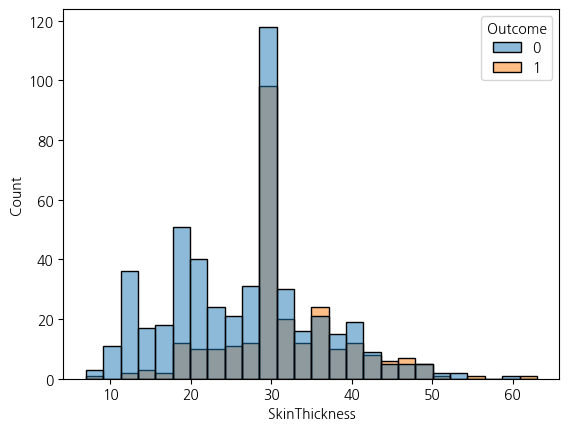

In [99]:
sns.histplot(x="SkinThickness", hue = "Outcome",data = df1 )

In [100]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,Obese
2,8,183.0,64.0,18.0,0,23.3,0.672,32,1,Over
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0,Obese
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1,Obese


In [101]:
df1.drop(columns=['BMI_category'], inplace=True)

In [102]:
df1.corr()['SkinThickness']

Pregnancies                 0.095987
Glucose                     0.199971
BloodPressure               0.185414
SkinThickness               1.000000
Insulin                     0.170811
BMI                         0.615035
DiabetesPedigreeFunction    0.128719
Age                         0.080790
Outcome                     0.251616
Name: SkinThickness, dtype: float64

In [103]:
df1['SkinThickness'].corr(df1['BMI'])

0.6150351543957953

In [104]:
df1['SkinThickness'].corr(df1['Outcome'])

0.2516156060644585

<Axes: xlabel='SkinThickness', ylabel='Count'>

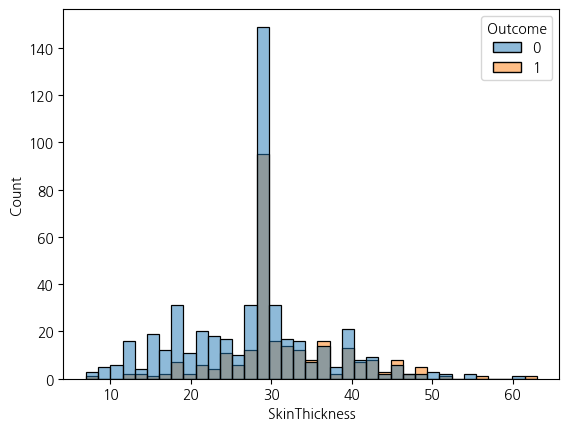

In [105]:
sns.histplot(x="SkinThickness", hue = "Outcome",data = df2 )

In [106]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_ind
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,0
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1,0


In [107]:
df2.corr()['SkinThickness']

Pregnancies                 0.091217
Glucose                     0.174644
BloodPressure               0.202442
SkinThickness               1.000000
Insulin                     0.129071
BMI                         0.499223
DiabetesPedigreeFunction    0.103358
Age                         0.105529
Outcome                     0.209743
SkinThickness_ind          -0.001403
Name: SkinThickness, dtype: float64

In [108]:
df2['SkinThickness'].corr(df2['BMI'])

0.49922252003741785

### **변수 인사이트 정리**

SkinThickness 변수가  0일 수는 없으므로 SkinThickness 변수값이 0인 자료들을 결측치라고 가정하였다. SkinThickness 변수같은 경우에는 모두 중앙값으로 대체하기에는 결측치의 개수가 많았기 때문에 두가지 방법으로 나누어 결측치를 대체하였다. 마지막에 모델링을 하면서 어떤 방법이 더 효과있는지 검증할 예정이다. 
또한 SkinThickness 변수의 값 중 99는 비정상적으로 큰 이상치이므로 결측치와 마찬가지로 NA 처리하고 중앙값으로 대체하였다. 
SkinThickness와 Outcome을 histogram을 통해 비교한 결과, SkinThickness 값이 클 수록 Outcome이 1에 가깝게 나오는 경향은 보이고 있으나, 유의미해 보이지는 않는다. 
마지막으로 상관관계를 분석해본 결과 SkinThickness 변수와 BMI 변수는 강한 상관관계를 보였으며, SkinThickness 변수와 Outcome 변수에서도 일정 수준의 상관관계가 관찰되었다. 

## **Insulin**
- 인슐린 분비량
- 당뇨병 유형은 인슐린이 선천적으로 나오지 않는 사람(1형)과 인슐린이 나오지만 인식을 못하는 사람(2형) 당뇨병 두가지가 있다.  
그러므로 0이 이상치가 아닐 수 있음  


In [109]:
# 셀 추가해서 EDA 하기

### 결측치 대체

In [110]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,18.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


In [111]:
df1['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [112]:
np.sort(df1['Insulin'].unique())

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

<Axes: >

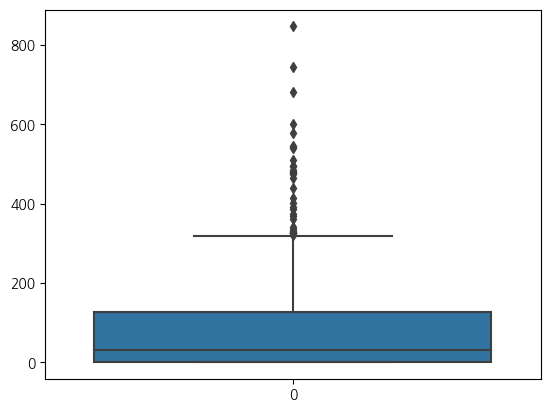

In [113]:
sns.boxplot(df1['Insulin'])

1형 당뇨, 2형 당뇨로 나누어 결측치를 처리하려고 했으나 전처리 시 종속변수를 활용할 수 없기 때문에 Insulin 값이 0인 자료는 모두 결측치로 가정하였다. 

In [114]:
low_Insulin_df1 = df1[df1['Insulin'] == 0]
low_Insulin_df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,18.0,0,23.3,0.672,32,1
5,5,116.0,74.0,30.0,0,25.6,0.201,30,0
7,10,115.0,72.0,30.0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,0,44.0,0.403,43,1
762,9,89.0,62.0,13.0,0,22.5,0.142,33,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
766,1,126.0,60.0,30.0,0,30.1,0.349,47,1


In [115]:
df1['Insulin'] = df1['Insulin'].replace(0, np.nan)

In [116]:
df1['Insulin'].isna().sum()

374

In [117]:
low_Insulin_df2 = df2[df2['Insulin'] == 0]
low_Insulin_df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_ind
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,0
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1,1
5,5,116.0,74.0,29.0,0,25.6,0.201,30,0,1
7,10,115.0,72.0,29.0,0,35.3,0.134,29,0,1
...,...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,0,44.0,0.403,43,1,0
762,9,89.0,62.0,29.0,0,22.5,0.142,33,0,1
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0,0
766,1,126.0,60.0,29.0,0,30.1,0.349,47,1,1


In [118]:
df2['Insulin'] = df2['Insulin'].replace(0, np.nan)

In [119]:
df2['Insulin'].isna().sum()

374

df1과 df2에 모두 인슐린 자료값이 0인 자료를 NA로 치환하였다. 

In [120]:
df1.corr()['Insulin']

Pregnancies                 0.082171
Glucose                     0.580756
BloodPressure               0.098272
SkinThickness               0.184888
Insulin                     1.000000
BMI                         0.228328
DiabetesPedigreeFunction    0.130395
Age                         0.220261
Outcome                     0.303454
Name: Insulin, dtype: float64

In [121]:
df1['Insulin'].corr(df1['Glucose'])

0.5807557896422835

Insulin 변수가 0인 값들(374개의 자료)이 NA로 치환됨. 모두 중앙값으로 대체하기에는 결측치의 개수가 많다. Insulin 변수도 SkinThickness 변수와 마찬가지로 df1, df2로 방법을 나누어 전처리를 진행하려고 한다. (Glucose, BMI, Age, Outcome 변수와 상관관계를 가진다.)

#### df1

In [122]:
df1['Insulin'] = df1.groupby(
    pd.cut(df1['Glucose'], bins=3)
)['Insulin'].transform(lambda x: x.fillna(x.median()))

In [123]:
(df1['Insulin'] == 0).sum()

0

In [124]:
df1['Insulin'].isna().sum()

0

#### df2

In [125]:
df2['Insulin_ind'] = df2['Insulin'].isna().astype(int)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_ind,Insulin_ind
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,0,1
2,8,183.0,64.0,29.0,NaN,23.3,0.672,32,1,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0


In [126]:
median_Insulin = df2['Insulin'].median()
median_Insulin

125.0

In [127]:
df2['Insulin'] = df2['Insulin'].fillna(median_Insulin)

In [128]:
(df2['Insulin'] == 0).sum()

0

In [129]:
df2['Insulin'].isna().sum()

0

이상치도 처리하고 싶었으나, 이상치의 개수가 너무 많아 대체했을때 원래 데이터 정보를 일부 소실할 수 있을 것 같아 처리하지 못했다. 

### EDA

#### df1

In [130]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,210.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,64.5,26.6,0.351,31,0
2,8,183.0,64.0,18.0,210.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Insulin', ylabel='Count'>

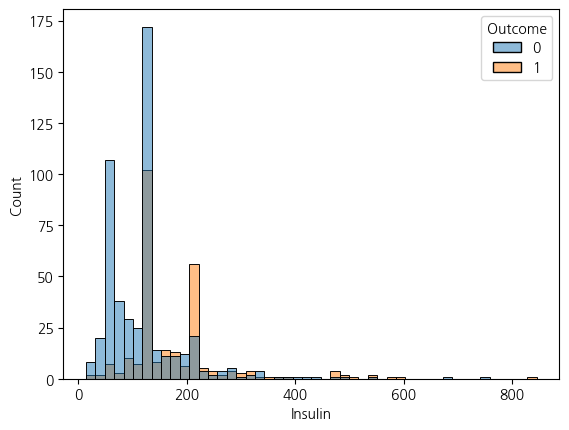

In [131]:
sns.histplot(x="Insulin", hue = "Outcome",data = df1 )

In [132]:
df1.corr()['Insulin']

Pregnancies                 0.049438
Glucose                     0.602397
BloodPressure               0.097288
SkinThickness               0.185473
Insulin                     1.000000
BMI                         0.211283
DiabetesPedigreeFunction    0.131954
Age                         0.149101
Outcome                     0.297824
Name: Insulin, dtype: float64

In [133]:
df1['Insulin'].corr(df1['Glucose'])

0.6023971923251764

In [134]:
df1['Insulin'].corr(df1['Outcome'])

0.2978242335889028

#### df2

In [135]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_ind,Insulin_ind
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0


<Axes: xlabel='Insulin', ylabel='Count'>

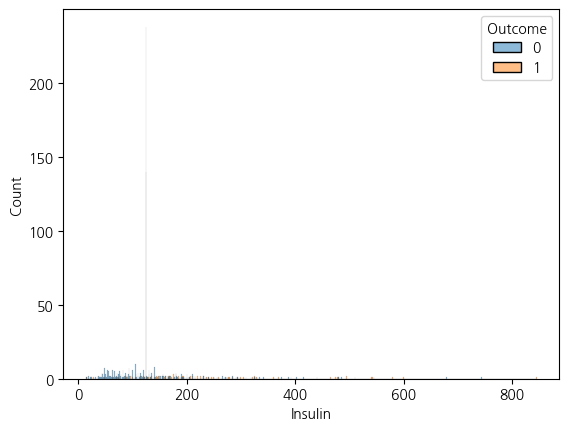

In [136]:
sns.histplot(x="Insulin", hue = "Outcome",data = df2 )

In [137]:
df2.corr()['Insulin']

Pregnancies                 0.025047
Glucose                     0.419451
BloodPressure               0.045363
SkinThickness               0.164394
Insulin                     1.000000
BMI                         0.170060
DiabetesPedigreeFunction    0.126503
Age                         0.097101
Outcome                     0.203790
SkinThickness_ind          -0.117595
Insulin_ind                -0.176874
Name: Insulin, dtype: float64

### **변수 인사이트 정리**

1형 당뇨, 2형 당뇨로 나누어 결측치를 처리하려고 했으나 전처리 시 종속변수를 활용할 수 없기 때문에 Insulin 값이 0인 자료는 모두 결측치로 가정하였다. Insulin 결측치를 모두 중앙값으로 대체하기에는 개수가 많기 때문에 SkinThickness 변수와 마찬가지로 df1, df2로 방법을 나누어 전처리를 진행하였다. df1은 상관관계가 높은 다른 변수를 기준으로 범주화하여 범주별 중앙값으로 결측값을 처리하였고, df2는 전체 중앙값으로 처리 후 indicator 변수를 새로 만들어 처음 자료가 결측치였다는 것을 명시하였다. 이상치의 경우에는 개수가 너무 많아 대체했을때 원래 데이터 정보를 소실할 수 있을 것 같아 처리하지 못했다. 
Insulin과 Outcome을 histogram을 통해 비교한 결과, Insulin과 Outcome 사이관계를 한 번에 알아보기는 힘들지만 Insulin이 118 이상일때 당뇨병일 확률이 증가하는 경향을 보인다는 것을 알 수 있다. 
상관관계를 분석해본 결과 Insulin과 변수와 Glucose 변수 간에 강한 상관관계가 나타났으며, BMI나 Outcome 변수 사이에서도 일정 수준의 상관관계가 관찰되었다. 

## **BMI**
- 0이 나올 수 없는 값

In [138]:
# 셀 추가해서  EDA 하기

### 결측치 대체

In [139]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,210.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,64.5,26.6,0.351,31,0
2,8,183.0,64.0,18.0,210.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [140]:
df1['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [141]:
np.sort(df1['BMI'].unique())

array([ 0. , 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20. , 20.1,
       20.4, 20.8, 21. , 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5,
       23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6,
       24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8,
       25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. ,
       28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.2,
       29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4,
       30.5, 30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. ,
       32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2,
       33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4,
       34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5,
       35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36

<Axes: >

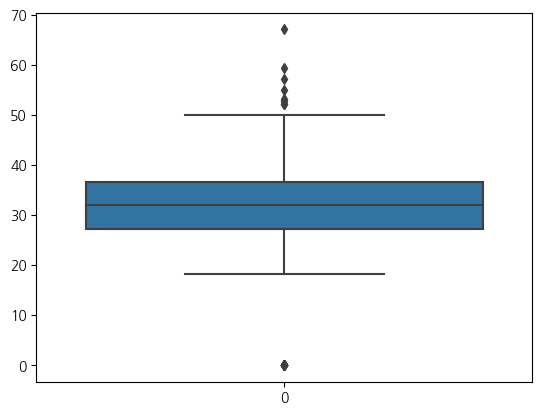

In [142]:
sns.boxplot(df1['BMI'])

#### df1

In [143]:
low_BMI_df1 = df1[df1['BMI'] == 0]
low_BMI_df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,21.0,130.0,0.0,0.232,54,1
49,7,105.0,72.0,21.0,130.0,0.0,0.305,24,0
60,2,84.0,72.0,21.0,64.5,0.0,0.304,21,0
81,2,74.0,72.0,21.0,64.5,0.0,0.102,22,0
145,0,102.0,75.0,23.0,130.0,0.0,0.572,21,0
371,0,118.0,64.0,23.0,89.0,0.0,1.731,21,0
426,0,94.0,72.0,21.0,64.5,0.0,0.256,25,0
494,3,80.0,72.0,21.0,64.5,0.0,0.174,22,0
522,6,114.0,72.0,21.0,130.0,0.0,0.189,26,0
684,5,136.0,82.0,21.0,130.0,0.0,0.640,69,0


In [144]:
df1['BMI'] = df1['BMI'].replace(0, np.nan)

In [145]:
df1['BMI'].isna().sum()

11

BMI 0인 값들(11개의 자료)이 NA로 치환됨. 결측치 개수가 적으므로 바로 중앙값으로 대체할 수 있다. 

In [146]:
median_BMI = df1['BMI'].median()

In [147]:
df1['BMI'] = df1['BMI'].fillna(median_BMI)

In [148]:
(df1['BMI'] == 0).sum()

0

In [149]:
df1['BMI'].isna().sum()

0

#### df2

In [150]:
low_BMI_df2 = df2[df2['BMI'] == 0]
low_BMI_df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_ind,Insulin_ind
9,8,125.0,96.0,29.0,125.0,0.0,0.232,54,1,1,1
49,7,105.0,72.0,29.0,125.0,0.0,0.305,24,0,1,1
60,2,84.0,72.0,29.0,125.0,0.0,0.304,21,0,1,1
81,2,74.0,72.0,29.0,125.0,0.0,0.102,22,0,1,1
145,0,102.0,75.0,23.0,125.0,0.0,0.572,21,0,0,1
371,0,118.0,64.0,23.0,89.0,0.0,1.731,21,0,0,0
426,0,94.0,72.0,29.0,125.0,0.0,0.256,25,0,1,1
494,3,80.0,72.0,29.0,125.0,0.0,0.174,22,0,1,1
522,6,114.0,72.0,29.0,125.0,0.0,0.189,26,0,1,1
684,5,136.0,82.0,29.0,125.0,0.0,0.640,69,0,1,1


In [151]:
df2['BMI'] = df2['BMI'].replace(0, np.nan)
df2['BMI'].isna().sum()

11

In [152]:
median_BMI = df2['BMI'].median()
df2['BMI'] = df2['BMI'].fillna(median_BMI)
(df2['BMI'] == 0).sum()

0

In [153]:
df2['BMI'].isna().sum()

0

### EDA

#### df1

<Axes: xlabel='BMI', ylabel='Count'>

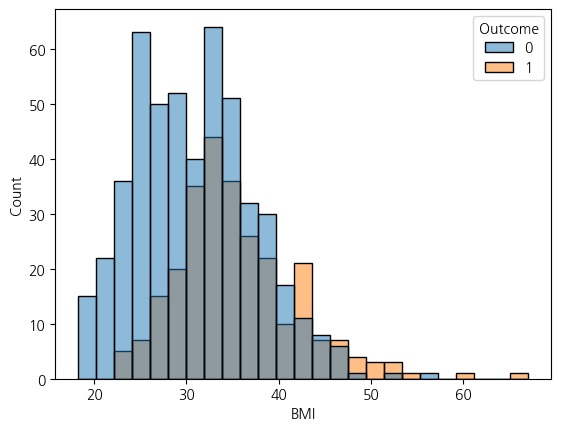

In [154]:
sns.histplot(x="BMI", hue = "Outcome",data = df1 )

In [155]:
df1['BMI_category'] = pd.cut(
    df1['BMI'],
    bins=[0, 18.5, 25, 30, 35, 40,100],
    labels=['Under', 'Normal', 'Over', 'Obese1', 'Obese2','highObese'],
    include_lowest=True
)

In [156]:
pd.crosstab(df1["Outcome"], df1["BMI_category"])

BMI_category,Under,Normal,Over,Obese1,Obese2,highObese
Outcome,,,,,,
0,4,101,136,130,87,42
1,0,7,44,102,61,54


In [157]:
pd.crosstab(df1["Outcome"], df1["BMI_category"],normalize='columns')

BMI_category,Under,Normal,Over,Obese1,Obese2,highObese
Outcome,,,,,,
0,1.0,0.935185,0.755556,0.560345,0.587838,0.4375
1,0.0,0.064815,0.244444,0.439655,0.412162,0.5625


Text(51.722222222222214, 0.5, 'Outcome')

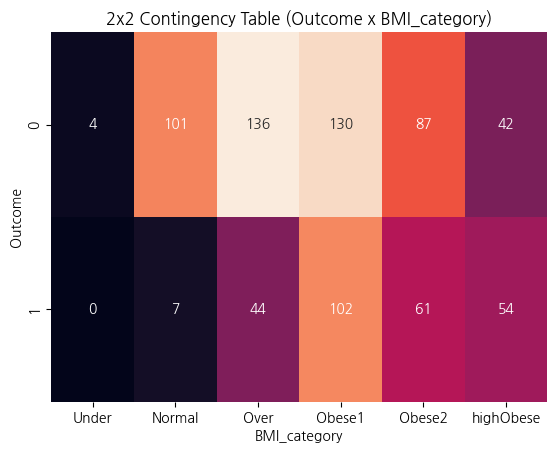

In [158]:
ct = pd.crosstab(df1["Outcome"], df1["BMI_category"])
sns.heatmap(ct, annot=True, fmt="d", cbar=False)
plt.title("2x2 Contingency Table (Outcome x BMI_category)")
plt.xlabel("BMI_category")
plt.ylabel("Outcome")

In [159]:
df1.drop(columns=['BMI_category'], inplace=True)

In [160]:
df1.corr()['BMI']

Pregnancies                 0.021559
Glucose                     0.231049
BloodPressure               0.281257
SkinThickness               0.653380
Insulin                     0.212162
BMI                         1.000000
DiabetesPedigreeFunction    0.153438
Age                         0.025597
Outcome                     0.312038
Name: BMI, dtype: float64

In [161]:
df1['BMI'].corr(df1['SkinThickness'])

0.6533804621054683

In [162]:
df1['BMI'].corr(df1['Outcome'])

0.312038338677111

In [163]:
df1['BMI'].corr(df1['BloodPressure'])

0.2812565644651022

#### df2

<Axes: xlabel='BMI', ylabel='Count'>

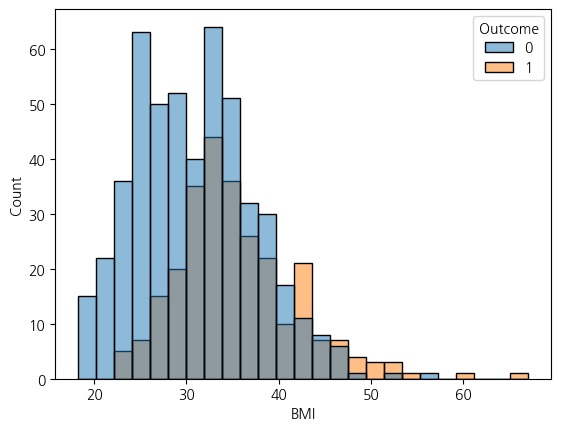

In [164]:
sns.histplot(x="BMI", hue = "Outcome",data = df2 )

In [165]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_ind,Insulin_ind
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0


In [166]:
df2.corr()['BMI']

Pregnancies                 0.021559
Glucose                     0.231049
BloodPressure               0.281257
SkinThickness               0.563613
Insulin                     0.180241
BMI                         1.000000
DiabetesPedigreeFunction    0.153438
Age                         0.025597
Outcome                     0.312038
SkinThickness_ind          -0.098487
Insulin_ind                -0.091925
Name: BMI, dtype: float64

In [167]:
df2['BMI'].corr(df2['SkinThickness'])

0.5636125496356165

In [168]:
df2['BMI'].corr(df2['Outcome'])

0.312038338677111

In [169]:
df2['BMI'].corr(df2['BloodPressure'])

0.2812565644651022

### **변수 인사이트 정리**

BMI 또한 0이 나올 수 없는 값이므로 0인 값들(11개의 자료)을 결측치로 가정 후 NA로 치환하였다. BMI는 결측치 개수가 적으므로 바로 중앙값으로 대체하였다.
BMI와 Outcome을 histogram을 통해 비교한 결과, BMI가 증가할수록 당뇨병일 확률이 증가하는 경향을 보인다는 것을 알 수 있다. 
더 자세히 알아보기 위해 국제기준으로 BMI를 범주화한 결과, table을 통해서 BMI가 증가할수록 당뇨병일 확률이 증가한다는 것을 알 수 있었다. '
마지막으로 상관관계를 분석해본 결과 BMI 변수와 SkinThickness 변수는 강한 상관관계를 보였으며, Outcome, BloodPressure 간에서도 일정 수준의 상관관계를 관찰할 수 있었다. 

## **파생변수 생성 및 추가 전처리**

In [170]:
# 셀 추가해서 하기

# **모델링하기**

#### df1

In [171]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,210.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,64.5,26.6,0.351,31,0
2,8,183.0,64.0,18.0,210.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [172]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [173]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [174]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 232            1     79.0           80.0           25.0     37.0  25.4   
 685            2    129.0           74.0           26.0    205.0  33.2   
 255            1    113.0           64.0           35.0    130.0  33.6   
 3              1     89.0           66.0           23.0     94.0  28.1   
 395            2    127.0           58.0           24.0    275.0  27.7   
 ..           ...      ...            ...            ...      ...   ...   
 45             0    180.0           66.0           39.0    210.0  42.0   
 328            2    102.0           86.0           36.0    120.0  45.5   
 333           12    106.0           80.0           18.0    130.0  23.6   
 644            3    103.0           72.0           30.0    152.0  27.6   
 98             6     93.0           50.0           30.0     64.0  28.7   
 
      DiabetesPedigreeFunction  Age  
 232                     0.583   22  
 685                  

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    random_state=1234,
    stratify=Y)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [176]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

# **각자 공부한 모델 쓰기**

In [177]:
# 4) 학습 수행
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import (
    recall_score, f1_score, roc_auc_score, average_precision_score,
    confusion_matrix, classification_report
)

In [178]:
model = GradientBoostingClassifier(
    loss="log_loss",
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    min_samples_leaf=20,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, Y_train) # 학습 수행

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=20,
                           random_state=42, subsample=0.8)

In [179]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [180]:
Y_train_pred = model.predict(X_train)

In [181]:
Y_test_pred = model.predict(X_test)

In [182]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  0.8524305555555556
검증 정확도 :  0.7552083333333334


In [183]:
f1 = f1_score(Y_test, Y_test_pred)
print('F1-score : {0:.4f}'.format(f1))

F1-score : 0.6050


In [184]:
proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(Y_test, proba)
print('ROC-AUC  : {0:.4f}'.format(auc))

ROC-AUC  : 0.8207


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [185]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling

In [186]:
# 파이프라인 구조 설계
#스케일링 하고 싶으면 StandardScaler() 사용

model_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    GradientBoostingClassifier(random_state=42)
)
model_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [187]:
from sklearn.model_selection import GridSearchCV

#### **공부한 모델의 하이퍼파라미터**

- 여기에 정리하기
- ex: 하이퍼 파라미터의 종류는 ~~가 있고, 값을 키우면 과적합이 발생할 수 있다.


In [188]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'gradientboostingclassifier__max_depth': [2, 3, 4],
    'gradientboostingclassifier__subsample': [0.7, 0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_model1 = GridSearchCV(
    model_pipe,
    param_grid=hyperparam,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)
grid_model1.fit(X_train, Y_train)
best_model1 = grid_model1.best_estimator_

하이퍼 파라미터의 종류는 n_estimators(트리개수), learning_rate(새로운 트리 반영률), max_depth(트리의 복잡도), subsample 등등이 있고, n_estimators와 learning_rate를 올리면 과적합이 발생할 수 있어 보통 n_estimators를 올리면 learning_rate를 낮추는 형태로 균형을 맞춘다. 또한 subsample은 과적합을 줄이는 효과가 있어 하이퍼 파라미터 튜닝 시 같이 튜닝한다. 

In [189]:
best_model1

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=300,
                                            random_state=42))])

In [190]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [191]:
from sklearn.metrics import classification_report

In [192]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       375
           1       0.95      0.94      0.95       201

    accuracy                           0.96       576
   macro avg       0.96      0.96      0.96       576
weighted avg       0.96      0.96      0.96       576



In [193]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       125
           1       0.65      0.64      0.65        67

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192



훈련 데이터에서는 F1-score가 0.95 이상의 값을 보였으나, 테스트 데이터에서는 Outcome=1에 대한 F1-score이 0.64로 감소하였다. 이는 모델이 훈련 데이터에 과적합된 것으로, 성능을 높이기 위한 방안이 필요하다. 

# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 test 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다.  

#### df2

In [194]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_ind,Insulin_ind
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0


In [195]:
X2 = df2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness_ind', 'Insulin_ind']]
Y2 = df2['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [196]:
train_test_split(X2,Y2)

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 511            0    139.0           62.0           17.0    210.0  22.1   
 65             5     99.0           74.0           27.0    125.0  29.0   
 535            4    132.0           72.0           29.0    125.0  32.9   
 722            1    149.0           68.0           29.0    127.0  29.3   
 335            0    165.0           76.0           43.0    255.0  47.9   
 ..           ...      ...            ...            ...      ...   ...   
 167            4    120.0           68.0           29.0    125.0  29.6   
 539            3    129.0           92.0           49.0    155.0  36.4   
 126            3    120.0           70.0           30.0    135.0  42.9   
 139            5    105.0           72.0           29.0    325.0  36.9   
 690            8    107.0           80.0           29.0    125.0  24.6   
 
      DiabetesPedigreeFunction  Age  SkinThickness_ind  Insulin_ind  
 511                     0.2

In [197]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    X2, Y2, 
    random_state=1234,
    stratify=Y2)

In [198]:
X2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
SkinThickness_ind           0
Insulin_ind                 0
dtype: int64

In [199]:
model2 = GradientBoostingClassifier(
    loss="log_loss",
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    min_samples_leaf=20,
    subsample=0.8,
    random_state=42
)
model2.fit(X_train2, Y_train2) # 학습 수행

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=20,
                           random_state=42, subsample=0.8)

In [200]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [201]:
Y_train_pred2 = model2.predict(X_train2)

In [202]:
Y_test_pred2 = model2.predict(X_test2)

In [203]:
print('학습 정확도 : ', accuracy_score(Y_train2, Y_train_pred2)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test2, Y_test_pred2))

학습 정확도 :  0.859375
검증 정확도 :  0.7552083333333334


In [204]:
f1_2 = f1_score(Y_test2, Y_test_pred2)
print('F1-score : {0:.4f}'.format(f1_2))

F1-score : 0.6179


In [205]:
proba2 = model2.predict_proba(X_test2)[:, 1]
auc2 = roc_auc_score(Y_test2, proba2)
print('ROC-AUC  : {0:.4f}'.format(auc2))

ROC-AUC  : 0.8230


In [206]:
# 파이프라인 구조 설계
#스케일링 하고 싶으면 StandardScaler() 사용

In [207]:
model2_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    GradientBoostingClassifier(random_state=42)
)
model2_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [208]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam2 = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'gradientboostingclassifier__max_depth': [2, 3, 4],
    'gradientboostingclassifier__subsample': [0.7, 0.8, 1.0]
}

cv2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_model2 = GridSearchCV(
    model2_pipe,
    param_grid=hyperparam2,
    cv=cv2,
    scoring='f1',
    n_jobs=-1
)
grid_model2.fit(X_train2, Y_train2)
best_model2 = grid_model2.best_estimator_

In [209]:
best_model2

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.03, max_depth=4,
                                            n_estimators=300, random_state=42,
                                            subsample=0.8))])

In [210]:
# 5) 평가
Y_train_pred2 = best_model2.predict(X_train2) # 학습 데이터의 예측값 계산
Y_test_pred2 = best_model2.predict(X_test2) # 검증데이터의 예측값 계산

In [211]:
# 학습 성능 평가
print(classification_report(Y_train2, Y_train_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       375
           1       0.99      0.99      0.99       201

    accuracy                           0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576



In [212]:
# 일반화 성능 평가
print(classification_report(Y_test2, Y_test_pred2))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       125
           1       0.63      0.60      0.62        67

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



1번 모델보다 일반화 성능이 더 감소하였다. 

당뇨병 예측 문제의 경우 재현율이 중요하지만, 이 모델에서는 F1-Score을 기준으로 하이퍼 파라미터를 튜닝해 일반화 성능이 낮다고 예측된다. 